In [13]:
# Global Suicide Rate Analysis
%matplotlib inline

# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [14]:
# Read master suicide rates data into dataframe
master_data_df = pd.read_csv("./source_data/master.csv")

# print(len(master_data_df))

master_data_df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [15]:
# Cleaningup raw data
master_data_df.columns

master_data_df = master_data_df.drop_duplicates()

master_data_df.rename(columns={' gdp_for_year ($) ': 'gdp_for_year ($)'}, inplace=True)

# print(len(master_data_df))
# print(master_data_df.count())


In [16]:
# Filtering 10 years data (2006-2015) 
ten_yr_df = master_data_df.loc[(master_data_df["year"]>2005) & (master_data_df["year"]<2016)]

# print(len(ten_yr_df))
# print(ten_yr_df.count())


In [17]:
# Determining Top 10 countries with higher suicide numbers
country_grp = ten_yr_df.groupby(["country"])

country_grp_df = pd.DataFrame({"total_population": country_grp["population"].sum()
                               ,"total_suicides_no": country_grp["suicides_no"].sum()
                              })

country_grp_df = country_grp_df.reset_index()

country_grp_df = country_grp_df.sort_values(["total_suicides_no"], ascending=False)

# print(len(country_grp_df))

country_grp_df.head(10)


,country,total_population,total_suicides_no
92,United States,2891288891,387385
71,Russian Federation,1349335058,334082
45,Japan,1206457577,278985
69,Republic of Korea,476613445,138480
34,Germany,782905332,98697
15,Brazil,1824017956,97856
32,France,531470558,90413
89,Ukraine,386269919,81876
65,Poland,361364561,59658
55,Mexico,1065964972,52100


In [18]:
# Filtering 10 year data for top 10 countries

top_country_ten_yr_df = pd.merge(ten_yr_df,country_grp_df.iloc[0:10], how='inner', on='country')

# print(len(top_country_ten_yr_df), top_country_ten_yr_df['country'].nunique())
# print(top_country_ten_yr_df.count())

top_country_ten_yr_df.head(30)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,total_population,total_suicides_no
0,Brazil,2006,male,75+ years,275,1575798,17.45,Brazil2006,NaN,"1,107,640,297,890",6403,Silent,1824017956,97856
1,Brazil,2006,male,55-74 years,1112,9247477,12.02,Brazil2006,NaN,"1,107,640,297,890",6403,Silent,1824017956,97856
2,Brazil,2006,male,35-54 years,2536,22709135,11.17,Brazil2006,NaN,"1,107,640,297,890",6403,Boomers,1824017956,97856
3,Brazil,2006,male,25-34 years,1537,15717099,9.78,Brazil2006,NaN,"1,107,640,297,890",6403,Generation X,1824017956,97856
4,Brazil,2006,male,15-24 years,1293,18063460,7.16,Brazil2006,NaN,"1,107,640,297,890",6403,Millenials,1824017956,97856
5,Brazil,2006,female,35-54 years,708,24105759,2.94,Brazil2006,NaN,"1,107,640,297,890",6403,Boomers,1824017956,97856
6,Brazil,2006,female,55-74 years,265,10786642,2.46,Brazil2006,NaN,"1,107,640,297,890",6403,Silent,1824017956,97856
7,Brazil,2006,female,15-24 years,387,17631557,2.19,Brazil2006,NaN,"1,107,640,297,890",6403,Millenials,1824017956,97856
8,Brazil,2006,female,25-34 years,333,15862415,2.10,Brazil2006,NaN,"1,107,640,297,890",6403,Generation X,1824017956,97856
9,Brazil,2006,female,75+ years,47,2466737,1.91,Brazil2006,NaN,"1,107,640,297,890",6403,Silent,1824017956,97856


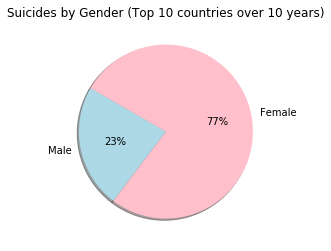

In [23]:
# Pie Chart, Top 10 Combined over 10 years, by Gender
# # Calculate Type Percents
# type_groupped = pyber_df.groupby(['type'])
# fare_sum = type_groupped['fare'].sum()
# # Build Pie Chart
# labels = ["Rural","Suburban","Urban"]
# explode = (0, 0, 0.1)
# colors = ["gold", "skyblue", "lightcoral"]
# plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
# plt.title("% of Total Fares by City Type")

# #show pie
# plt.show()
#Calculate Gender Percents
Gender_grouped = top_country_ten_yr_df.groupby(['sex'])
Suicides_sum = Gender_grouped['suicides_no'].sum()
#Build Pie Chart
labels = ["Male","Female"]
colors = ["lightblue","pink"]
plt.pie(Suicides_sum, labels=labels, colors=colors, autopct="%1.0f%%",shadow=True,startangle=150)
plt.title("Suicides by Gender (Top 10 countries over 10 years)")
plt.savefig("./Suicides_by_Gender.png")

TypeError: 'DataFrameGroupBy' object is not callable

age
05-14 years     10573
15-24 years    174194
25-34 years    258951
35-54 years    589917
55-74 years    416304
75+ years      169593
Name: suicides_no, dtype: int64


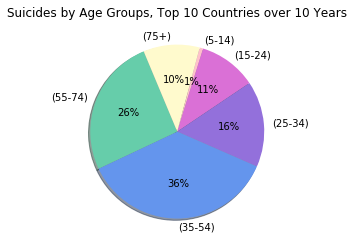

In [36]:
#Pie Chart, Age Buckets, Top 10 countries, 10 years)
top_country_ten_yr_df = top_country_ten_yr_df.replace("5-14 years","05-14 years")
age_grouped = top_country_ten_yr_df.groupby(['age'])


Age_sum = age_grouped['suicides_no'].sum()
print(Age_sum)
#Build Pie Chart
labels = ["(5-14)","(15-24)","(25-34)","(35-54)","(55-74)","(75+)"]
colors = ["pink","orchid","mediumpurple","cornflowerblue","mediumaquamarine","lemonchiffon"]
plt.pie(Age_sum, labels=labels, autopct="%1.0f%%", shadow=True, startangle=75, counterclock=False, colors=colors)
plt.title("Suicides by Age Groups, Top 10 Countries over 10 Years")

plt.savefig("./Suicides_by_Age_Groups.png")

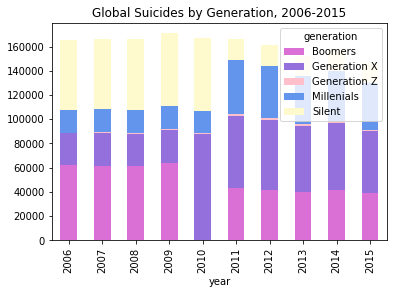

In [26]:
#Stacked Bar Chart: Generations (United States) (separated by years), generations make up the stack of each year
# Create an array that contains the number of users each language has
Generations_grouped = top_country_ten_yr_df.groupby(['year', 'generation'])
labels = ["Millenials", "Generation X", "Generation Z" "Boomer", "Silent"]
y_axis = Generations_grouped['suicides_no'].sum()
x_axis = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
colors=["orchid","mediumpurple","pink","cornflowerblue","lemonchiffon"]
y_axis.unstack().plot(kind='bar', stacked=True, colors=colors)
plt.title("Global Suicides by Generation, 2006-2015")
plt.savefig("./Global_Suicides_by_Generation.png")

<function print>

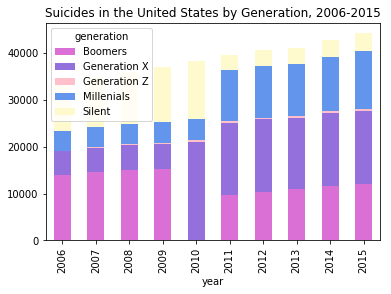

In [27]:
#Stacked Bar Chart: Generations (United States) (separated by years), generations make up the stack of each year
# Create an array that contains the number of users each language has
top_country_ten_yr_df_new = top_country_ten_yr_df.loc[top_country_ten_yr_df['country']== "United States"]
Generations_grouped = top_country_ten_yr_df_new.groupby(['year', 'generation'])
labels = ["Millenials", "Generation X", "Generation Z" "Boomer", "Silent"]
y_axis = Generations_grouped['suicides_no'].sum()
x_axis = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
colors=["orchid","mediumpurple","pink", "cornflowerblue","lemonchiffon"]
y_axis.unstack().plot(kind='bar', stacked=True, colors=colors)
plt.title("Suicides in the United States by Generation, 2006-2015")
plt.savefig("./Suicides_US_by_Generation.png")
print